## Malaria Incidence Prediction


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project aims to understand how factors such as rainfall, temperature and geographical location affect malaria incidence. 

### 2) Data Collection
- Raw Dataset Source
- - https://climateknowledgeportal.worldbank.org/download-data
  - http://apps.who.int/gho/data/node.gswcah
  - https://developers.google.com/public-data/docs/canonical/countries_csv
- The processed data consists of 9 columns and 2068 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [144]:
df = pd.read_csv('data/processed_data.csv')

#### Show Top 5 Records

In [145]:
df.head()

year country  precipitation  AvMeanSurAirTemp  AvMaxSurAirTemp  \
0  2000   Congo        1644.79             24.49            29.03   
1  2001   Congo        1516.01             24.68            29.22   
2  2002   Congo        1717.96             24.76            29.30   
3  2003   Congo        1573.98             24.73            29.27   
4  2004   Congo        1507.59             24.83            29.37   

   AvMinSurAirTemp  incidence  longitude  latitude  
0            19.99  353.41557  15.827659 -0.228021  
1            20.19  350.93625  15.827659 -0.228021  
2            20.26  321.67402  15.827659 -0.228021  
3            20.23  319.21132  15.827659 -0.228021  
4            20.33  317.81208  15.827659 -0.228021

#### Shape of the dataset

In [146]:
df.shape

(2068, 9)

### 2.2 Dataset information

- **year** : the year in which the data was collected. i.e 2001, 2015, 2022, etc
- **country** : name of the country where the data was collected. i.e Cameroon, Nigeria, Brazil, etc.
- **precipitation** : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- **AvMeanSurAirTemp** : Average Mean Surface Air Temperature 
- **AvMaxSurAirTemp** : Average Maximum Surface Air Temperature
- **AvMinSurAirTemp** : Average Minimum Surface Temperature
- **incidence** : Malaria Incidence Rate Per 1000 of population
- **latitude**
- **longitude**

### 3. Data Checks to perform


- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1. Checking Missing Values

In [147]:
df.isna().sum()

year                0
country             0
precipitation       0
AvMeanSurAirTemp    0
AvMaxSurAirTemp     0
AvMinSurAirTemp     0
incidence           0
longitude           0
latitude            0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [148]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [149]:
x = df.info()
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2068 non-null   int64  
 1   country           2068 non-null   object 
 2   precipitation     2068 non-null   float64
 3   AvMeanSurAirTemp  2068 non-null   float64
 4   AvMaxSurAirTemp   2068 non-null   float64
 5   AvMinSurAirTemp   2068 non-null   float64
 6   incidence         2068 non-null   float64
 7   longitude         2068 non-null   float64
 8   latitude          2068 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 145.5+ KB


### 3.4 Checking the number of unique values of each column

In [150]:
df.nunique()

year                  22
country               97
precipitation       2039
AvMeanSurAirTemp    1037
AvMaxSurAirTemp     1057
AvMinSurAirTemp     1044
incidence           1830
longitude             97
latitude              97
dtype: int64

### 3.5 Check statistics of data set

In [151]:
df.describe()

year  precipitation  AvMeanSurAirTemp  AvMaxSurAirTemp  \
count  2068.000000    2068.000000       2068.000000      2068.000000   
mean   2010.472921    1290.679826         23.239850        28.912084   
std       6.310062     875.137938          5.225205         5.184899   
min    2000.000000      27.280000          3.280000         8.840000   
25%    2005.000000     452.522500         21.907500        27.825000   
50%    2011.000000    1218.790000         24.780000        29.950000   
75%    2016.000000    1902.110000         26.510000        31.750000   
max    2021.000000    3596.600000         30.010000        36.950000   

       AvMinSurAirTemp    incidence    longitude     latitude  
count      2068.000000  2068.000000  2068.000000  2068.000000  
mean         17.614937   112.926032    20.252609     9.639312  
std           5.532299   155.757693    61.224523    17.466417  
min          -2.270000     0.000000  -102.552784   -38.416097  
25%          14.980000     0.599777   -10.940835    -0.789275  
50%          19.710000    14.506950    24.684866     9.847252  
75%          21.540000   219.613490    53.847818    20.593684  
max          24.110000   723.285950   166.959158    48.019573

#### Insight
- From above description of numerical data, most of the means are quite close to each other - between 9.63 and 28.91. The means of precipitation and year are rather large. So, the data will have to be normalized before modeling;
- The standard deviations are quite much compared to the means;
- The data is measure between the years 2000 and 2021.

### 3.6 Exploring Data

In [152]:
df.head()

year country  precipitation  AvMeanSurAirTemp  AvMaxSurAirTemp  \
0  2000   Congo        1644.79             24.49            29.03   
1  2001   Congo        1516.01             24.68            29.22   
2  2002   Congo        1717.96             24.76            29.30   
3  2003   Congo        1573.98             24.73            29.27   
4  2004   Congo        1507.59             24.83            29.37   

   AvMinSurAirTemp  incidence  longitude  latitude  
0            19.99  353.41557  15.827659 -0.228021  
1            20.19  350.93625  15.827659 -0.228021  
2            20.26  321.67402  15.827659 -0.228021  
3            20.23  319.21132  15.827659 -0.228021  
4            20.33  317.81208  15.827659 -0.228021

#### 3.6.1. Explore how incidence varies between 2000 and 2021

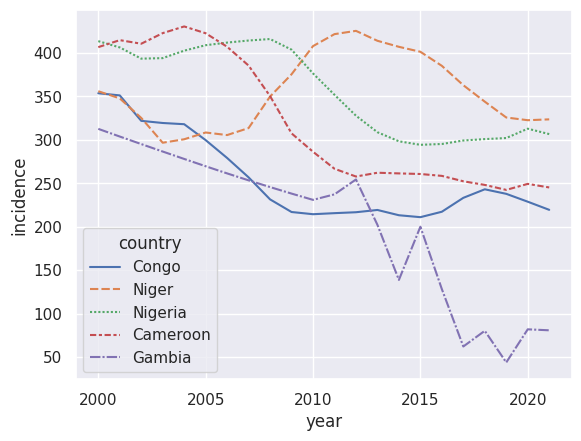

In [153]:
# compare incidence between Cameron, Nigeria, Gambia, Congo
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="year", y="incidence",
             hue="country", style="country",
             data=df[df.country.isin(["Cameroon", "Nigeria", "Gambia", "Congo", "Niger"])]
            );

#### Insight
- From this plot, it can be seen that the incidence of malaria in the selected countries is generally decreasing.
- The incidence rate is decreasing very fast for Gambia. This is quite interesting.
- It will be interesting to see how incidence varies in all countries but it is impossible to visualize all 98 countries. So, we will use 5 countries for exploration

In [154]:
# chose 5 countries
chosen_countries = ["Cameroon", "Nigeria", "Gambia", "Congo", "Niger"]
chosen_countries

['Cameroon', 'Nigeria', 'Gambia', 'Congo', 'Niger']

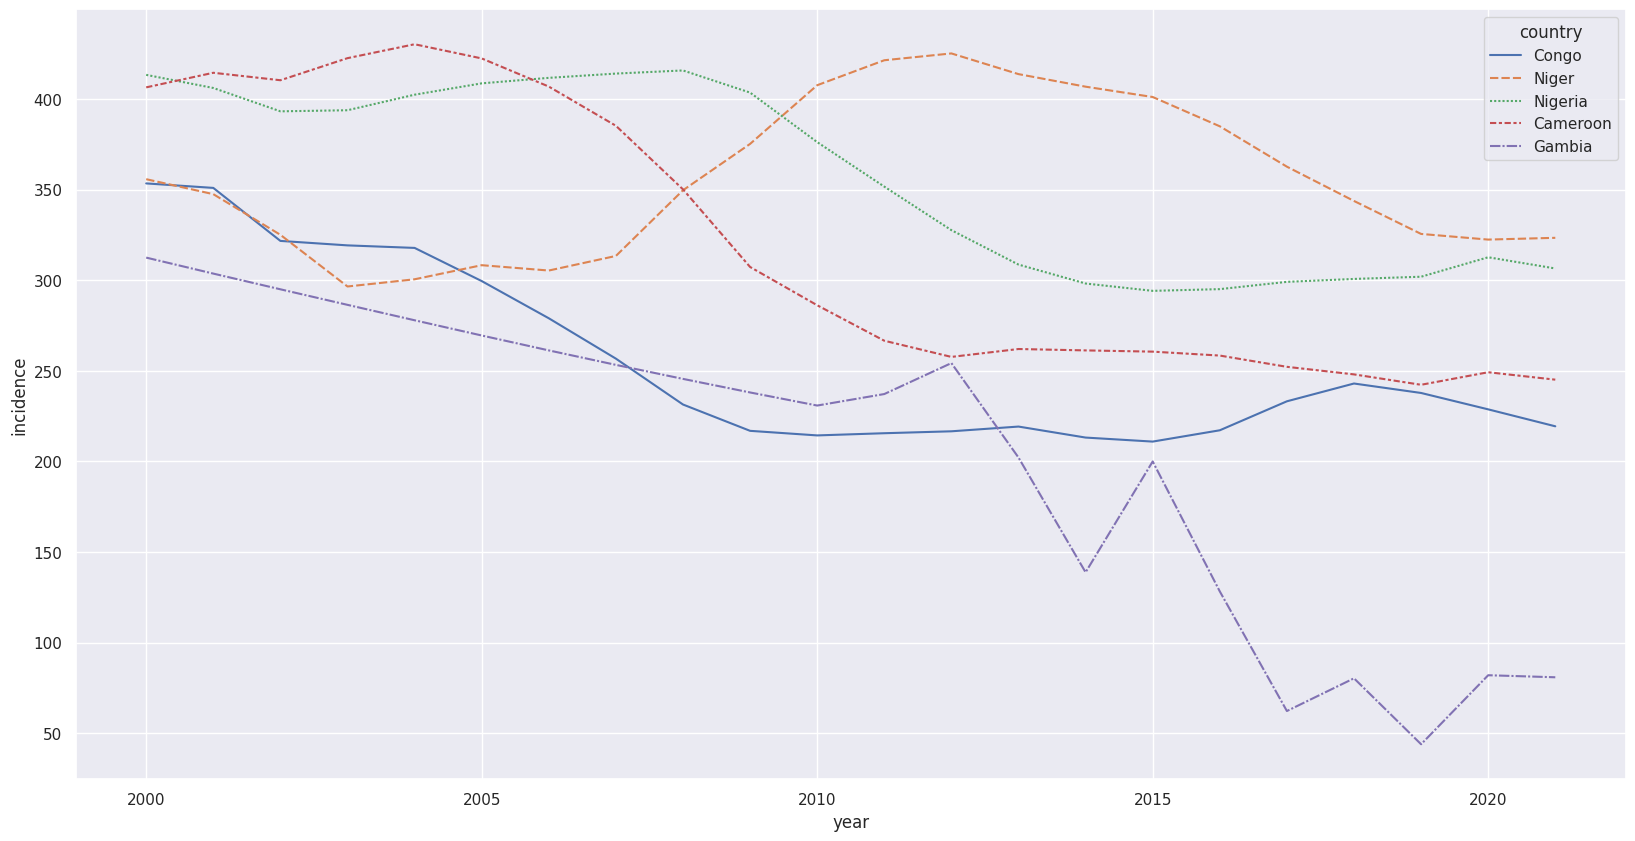

In [155]:
# compare incidence between 10 random countries
sns.set_theme(style="darkgrid")
f,ax=plt.subplots(1,1,figsize=(20,10))
# Plot the responses for different events and regions
sns.lineplot(x="year", y="incidence",
             hue="country", style="country",
             data=df[df.country.isin(chosen_countries)],
             legend = "brief",
             ax=ax
            );

#### 3.6.2. Prepare Classification Target
The incidence column can be used for regression tasks. But for classification, we need to split the incidence values into classes.
- i.e: high incidence and low incidence for binary classification
- and high incidence, medium incidence and low incidence for multi-class classification.

> For now we can set a threshold of 10. An incidence value greater than or equals to 10 will be regarded as high while and incidence value less than 10 will be regarded as low.

**Note:** An incidence value of 10 means that for every 1000 people in a population, 10 people get infected with malaria. 

In [156]:
df["group"] = df["incidence"].apply(lambda x: "high incidence" if x >= 10 else "low incidence")
df.head()

year country  precipitation  AvMeanSurAirTemp  AvMaxSurAirTemp  \
0  2000   Congo        1644.79             24.49            29.03   
1  2001   Congo        1516.01             24.68            29.22   
2  2002   Congo        1717.96             24.76            29.30   
3  2003   Congo        1573.98             24.73            29.27   
4  2004   Congo        1507.59             24.83            29.37   

   AvMinSurAirTemp  incidence  longitude  latitude           group  
0            19.99  353.41557  15.827659 -0.228021  high incidence  
1            20.19  350.93625  15.827659 -0.228021  high incidence  
2            20.26  321.67402  15.827659 -0.228021  high incidence  
3            20.23  319.21132  15.827659 -0.228021  high incidence  
4            20.33  317.81208  15.827659 -0.228021  high incidence

In [157]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['year', 'precipitation', 'AvMeanSurAirTemp', 'AvMaxSurAirTemp', 'AvMinSurAirTemp', 'incidence', 'longitude', 'latitude']

We have 2 categorical features : ['country', 'group']


In [158]:
print(df.group.value_counts())

group
high incidence    1092
low incidence      976
Name: count, dtype: int64


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize incidence distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

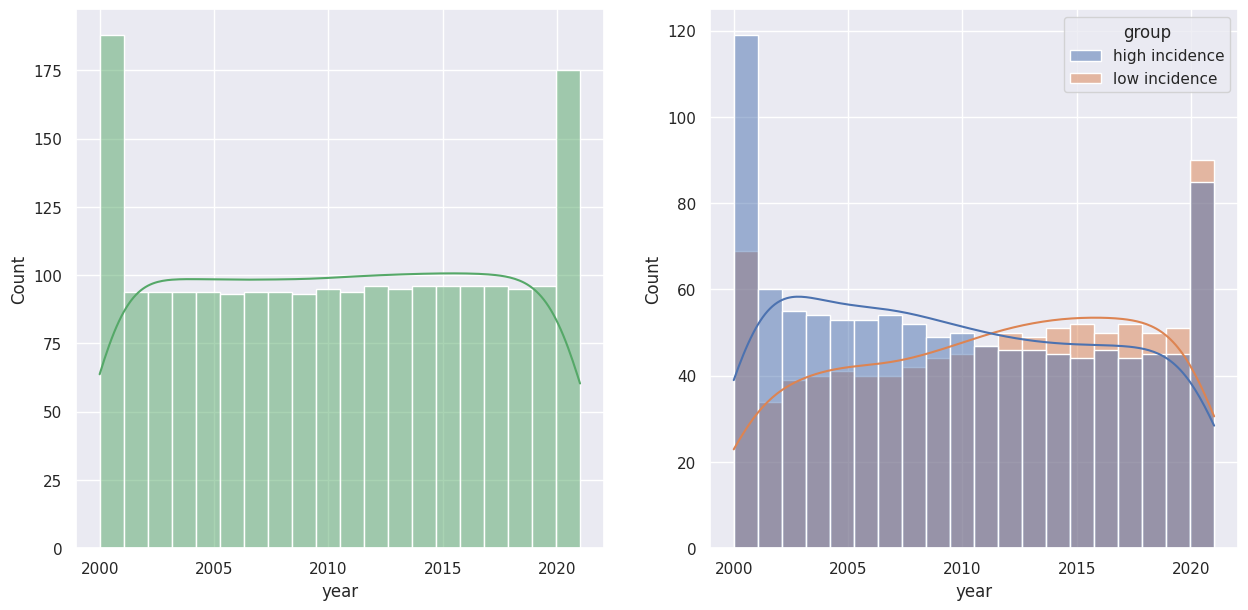

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='year',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='year',bins=20, kde=True,hue='group')
plt.show()

#####  Insights
- The data shows that the number of countries with high incidence in malaria has been droping gradually while the number of countries with low malaria incidence have been reducing.

#### 4.2.1 GROUP COLUMN
- How is distribution of Incidence Group ?

#### UNIVARIATE ANALYSIS ( How is distribution of Incidence Group ? )

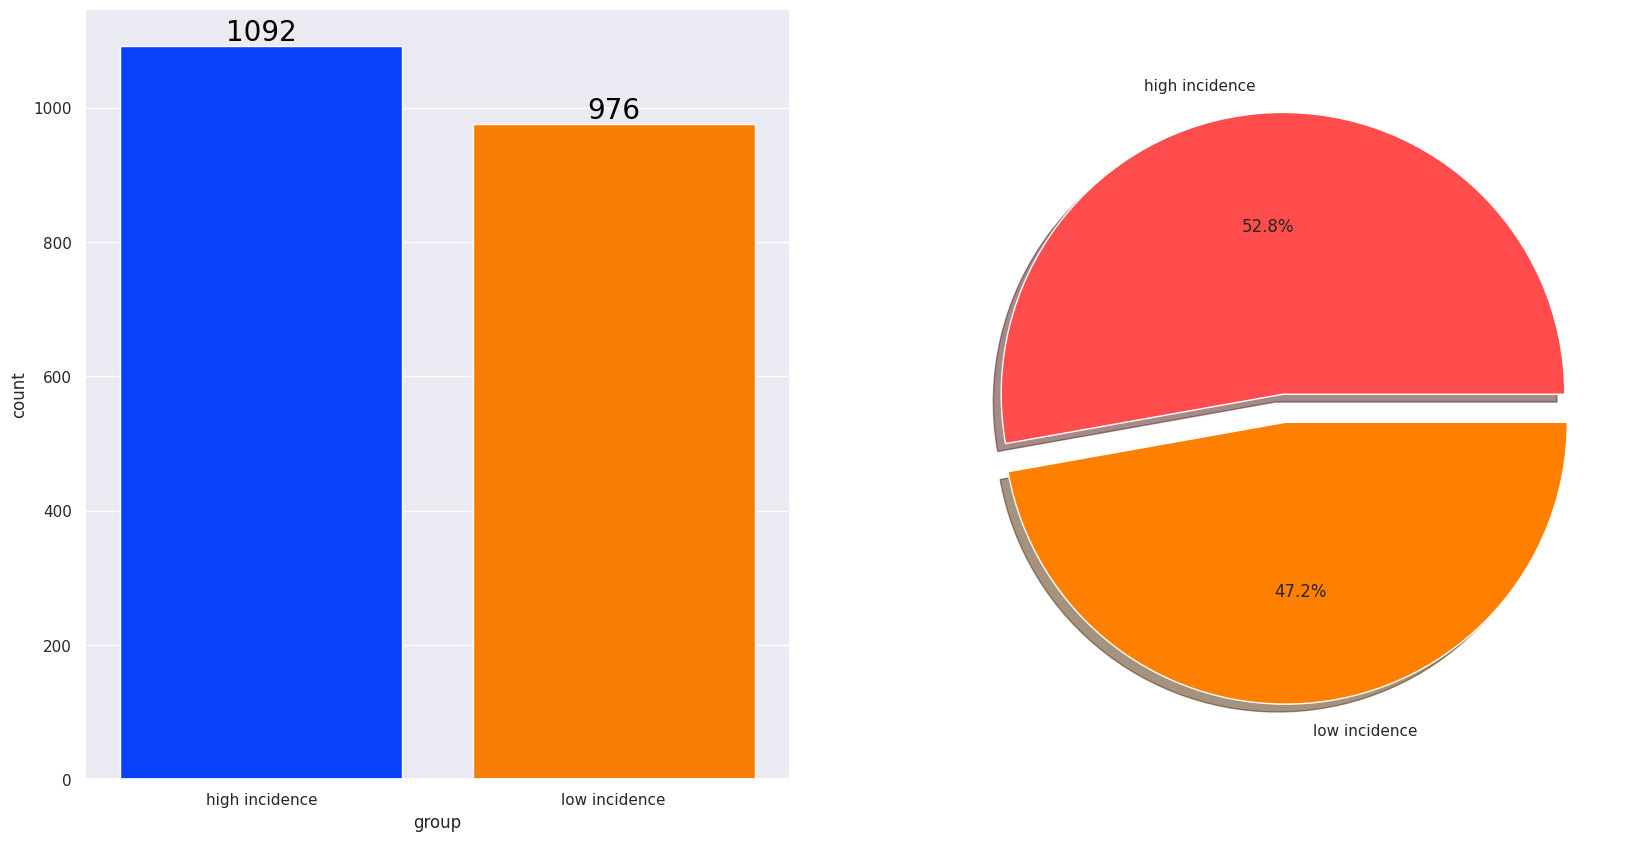

In [172]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['group'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['group'].value_counts(),labels=['high incidence','low incidence'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- The data is balanced. The are a fair number of observations from both groups.
- There are 1092 obsrvations for high malaria incidence and 976 observations for low malaria incidence.

#### 4.3.1. COUNTRY COLUMN
- How is Country wise distribution ?

#### UNIVARIATE ANALYSIS ( How is Country wise distribution ?)

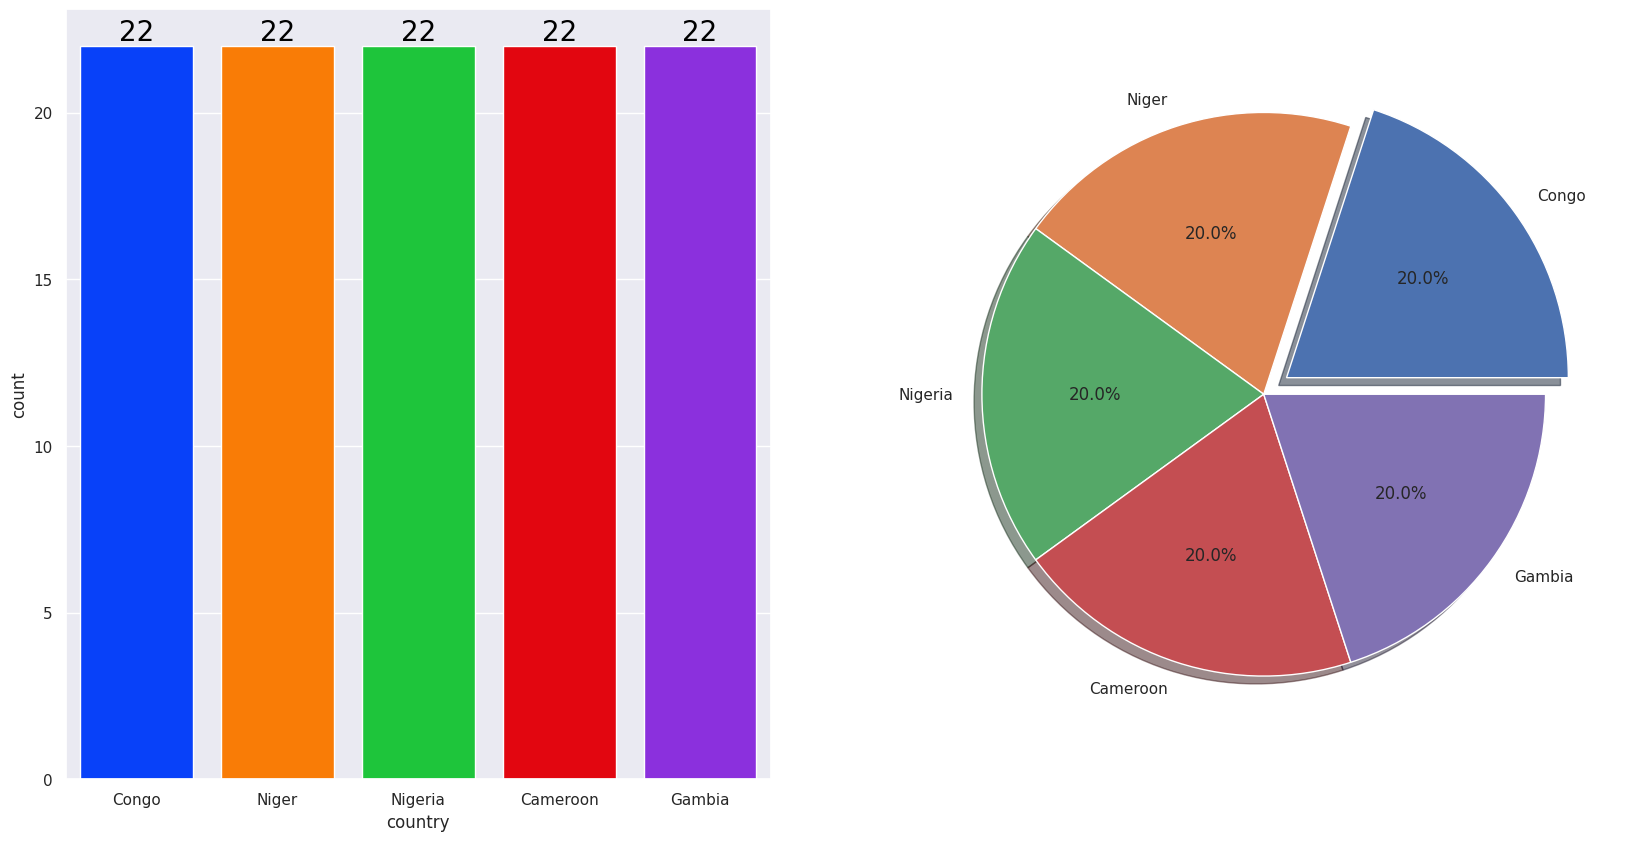

In [173]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df[df.country.isin(chosen_countries)]['country'],
              data=df[df.country.isin(chosen_countries)],
              palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df[df.country.isin(chosen_countries)]['country'].value_counts(),labels=df[df.country.isin(chosen_countries)]['country'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- The data is evenly measured for all countries.

#### 4.4.1 PRECIPITATION COLUMN
- How does distribution of Incidence Group vary with precipitation?

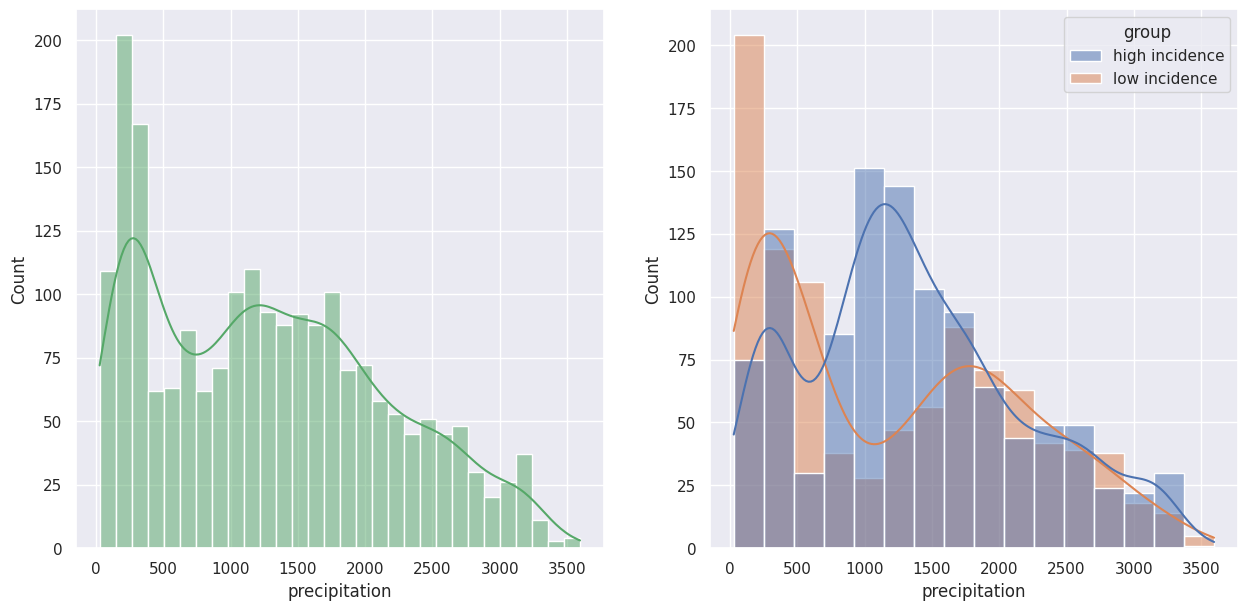

In [175]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,
             x='precipitation',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,
             x='precipitation',kde=True,hue='group')
plt.show()

#### Insight
- The graph shows a strong correlation between precipitation and malaria incidence.
- When the precipitation is less than 750, malaria incidence is mostly low. However, when the precipitation is betweeb 750 and 2000, malaria incidence is mostly high. 
- But as the precipitation exceeds 2000, malaria incidence is mostly low. This might be because mosquitoes tend to avoid heavy rain by seeking shelter under leaves or other objects.

#### 4.5.1 AvMeanSurAirTemp COLUMN
- How does distribution of Incidence Group vary with average mean surface air temperature?

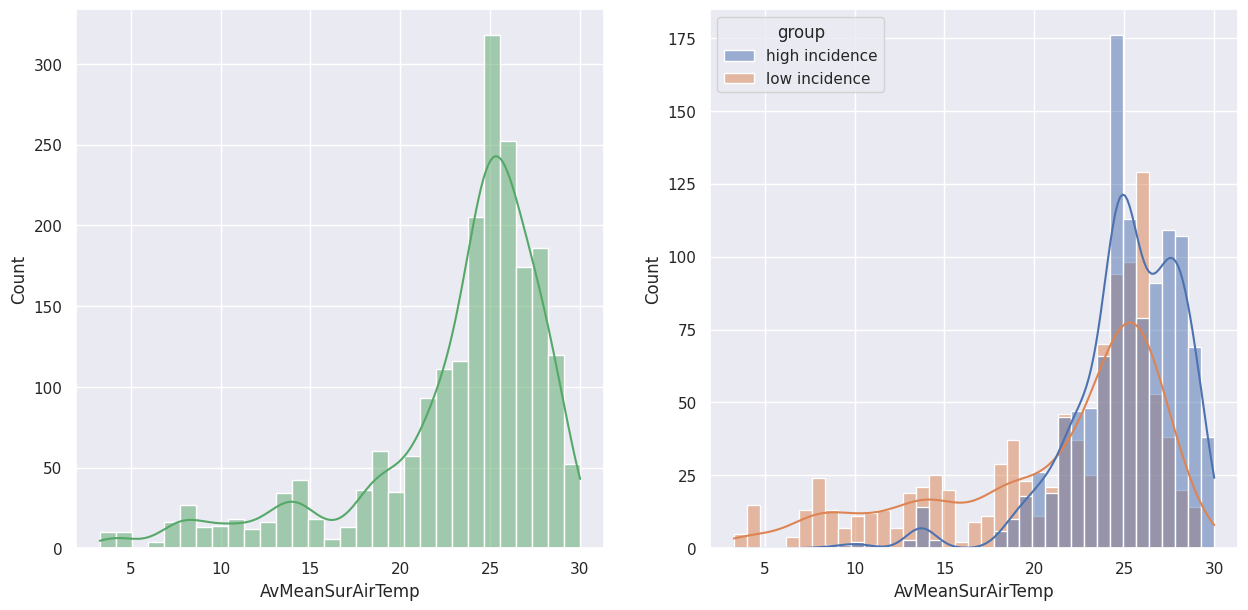

In [177]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,
             x='AvMeanSurAirTemp',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,
             x='AvMeanSurAirTemp',kde=True,hue='group')
plt.show()

#### Insight
- This plot shows a strong positive correlation between malaria incidence and average mean surface air temperature. 
- It can be seen that malaria incidence is generally low when average mean surface air temperature is low (below 21) and vice versa.

#### 4.6.1 AvMaxSurAirTemp COLUMN
- How is distribution of Incidence Group vary with average maximum surface air temperature?

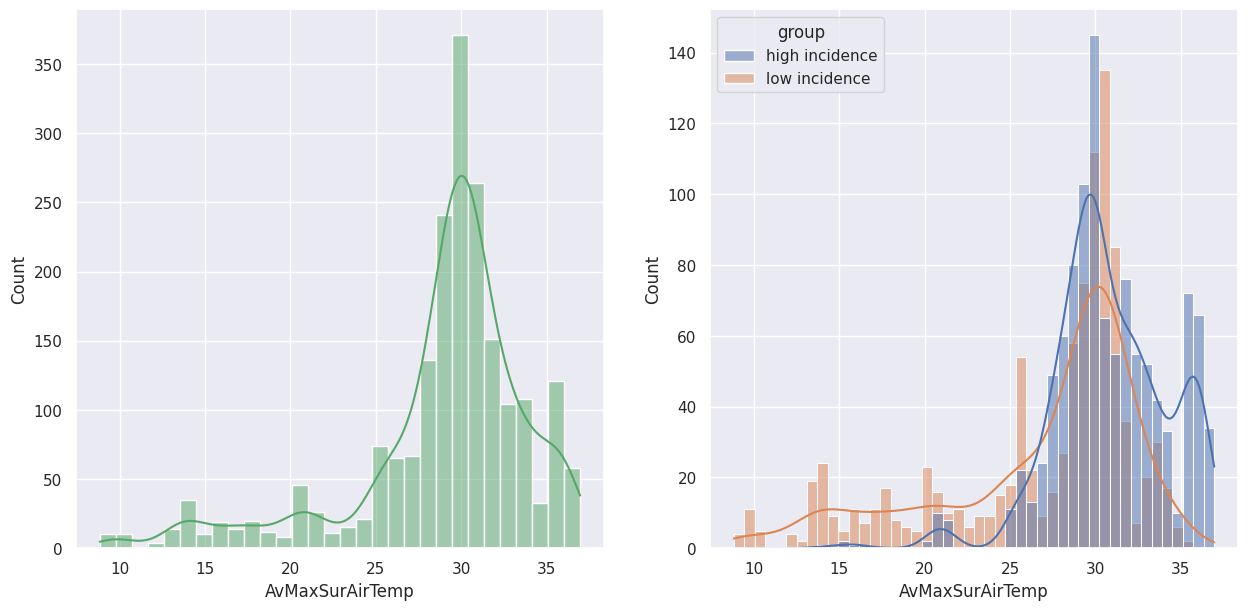

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,
             x='AvMaxSurAirTemp',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,
             x='AvMaxSurAirTemp',kde=True,hue='group')
plt.show()

#### Insight
- This plot shows a strong positive correlation between malaria incidence and average maximum surface air temperature.
- It can be seen that malaria incidence is generally low when average maximum surface air temperature is low (below 26) and vice versa.


#### 4.7.1 AvMinSurAirTemp COLUMN
- How is distribution of Incidence Group vary with average minimum surface air temperature?

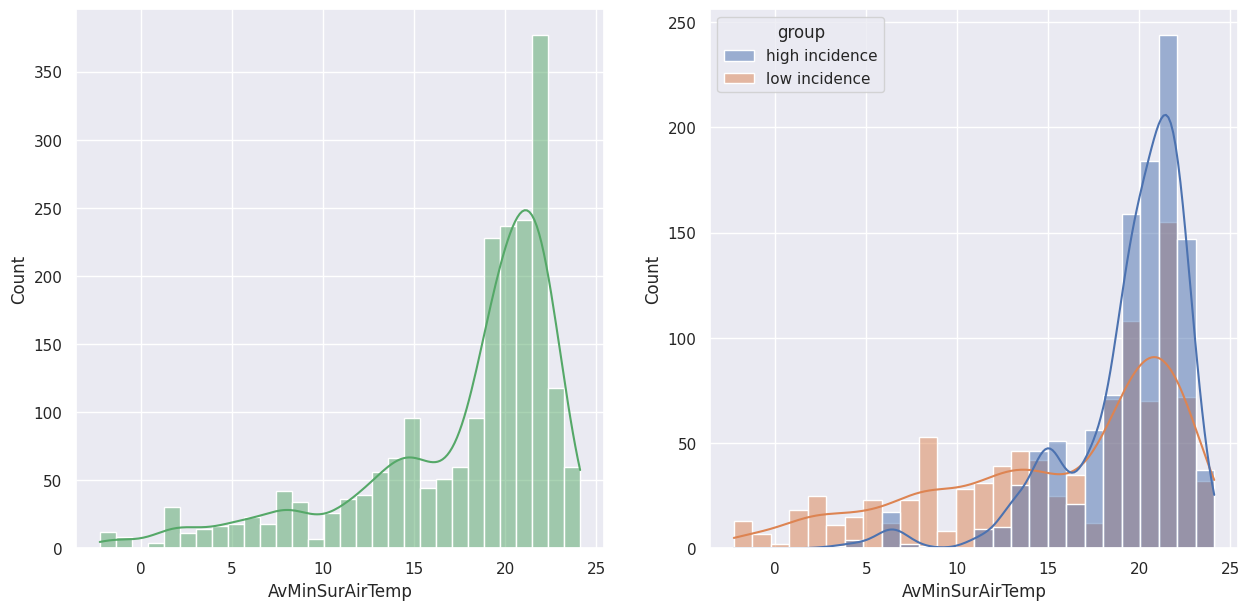

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,
             x='AvMinSurAirTemp',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,
             x='AvMinSurAirTemp',kde=True,hue='group')
plt.show()

#### Insight
- This plot shows a strong positive correlation between malaria incidence and average minimum surface air temperature.
- It can be seen that malaria incidence is generally low when average minimum surface air temperature is low (below 15) and vice versa.


#### 5. CHECKING OUTLIERS

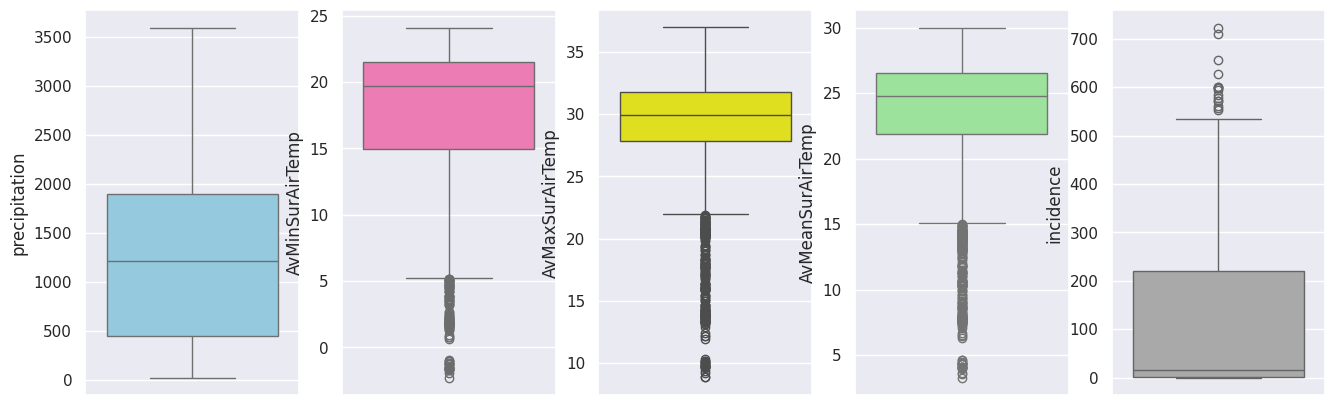

In [180]:
plt.subplots(1,5,figsize=(16,5))
plt.subplot(151)
sns.boxplot(df['precipitation'],color='skyblue')
plt.subplot(152)
sns.boxplot(df['AvMinSurAirTemp'],color='hotpink')
plt.subplot(153)
sns.boxplot(df['AvMaxSurAirTemp'],color='yellow')
plt.subplot(154)
sns.boxplot(df['AvMeanSurAirTemp'],color='lightgreen')
plt.subplot(155)
sns.boxplot(df['incidence'],color='darkgray')
plt.show()

#### Insight
- The Precipitation points doesn't seem to have any outliers.
- Temperature measurements however do. Some countries are either very hot or very cold, which is very usual. 
- There are a few malaria incidence outliers as well. I find it unusual for over 50% of a population to be infected with malaria in a given year. We can examine some of these counttries to see that these are not errors.

In [181]:
df.head()

year country  precipitation  AvMeanSurAirTemp  AvMaxSurAirTemp  \
0  2000   Congo        1644.79             24.49            29.03   
1  2001   Congo        1516.01             24.68            29.22   
2  2002   Congo        1717.96             24.76            29.30   
3  2003   Congo        1573.98             24.73            29.27   
4  2004   Congo        1507.59             24.83            29.37   

   AvMinSurAirTemp  incidence  longitude  latitude           group  
0            19.99  353.41557  15.827659 -0.228021  high incidence  
1            20.19  350.93625  15.827659 -0.228021  high incidence  
2            20.26  321.67402  15.827659 -0.228021  high incidence  
3            20.23  319.21132  15.827659 -0.228021  high incidence  
4            20.33  317.81208  15.827659 -0.228021  high incidence

In [185]:
# examine outlier incidence countries
df2 = df[df.incidence >500]
df2

year          country  precipitation  AvMeanSurAirTemp  AvMaxSurAirTemp  \
45    2001    Côte d'Ivoire        1394.07             26.64            31.88   
46    2002    Côte d'Ivoire        1301.59             26.89            32.09   
47    2003    Côte d'Ivoire        1408.60             26.84            32.00   
48    2004    Côte d'Ivoire        1306.90             26.87            31.93   
170   2017           Rwanda        1122.51             19.48            25.51   
792   2000  Solomon Islands        3183.73             26.00            29.83   
793   2001  Solomon Islands        3183.77             25.89            29.69   
794   2002  Solomon Islands        3183.70             25.91            29.71   
795   2003  Solomon Islands        3183.72             25.92            29.72   
796   2004  Solomon Islands        3183.56             25.97            29.77   
797   2005  Solomon Islands        3183.72             25.95            29.76   
798   2006  Solomon Islands        3183.79             25.94            29.74   
1367  2000     Burkina Faso         714.73             29.06            35.46   
1368  2001     Burkina Faso         749.26             29.19            35.67   
1369  2002     Burkina Faso         690.37             29.47            35.75   
1370  2003     Burkina Faso         935.59             29.34            35.61   
1371  2004     Burkina Faso         752.75             29.41            35.63   
1372  2005     Burkina Faso         822.76             29.64            35.71   
1373  2006     Burkina Faso         793.02             29.29            35.60   
1374  2007     Burkina Faso         875.58             29.38            35.63   
1375  2008     Burkina Faso         830.84             28.89            35.20   
1376  2009     Burkina Faso         872.17             29.55            35.76   
1377  2010     Burkina Faso         898.43             29.61            35.84   
1378  2011     Burkina Faso         735.40             29.50            35.81   
1379  2012     Burkina Faso         921.93             29.15            35.19   
1871  2001           Uganda        1247.62             23.38            29.50   
1872  2002           Uganda        1258.32             23.74            29.81   

      AvMinSurAirTemp  incidence   longitude   latitude           group  
45              21.45  511.36467   -5.547080   7.539989  high incidence  
46              21.74  512.79209   -5.547080   7.539989  high incidence  
47              21.74  511.70351   -5.547080   7.539989  high incidence  
48              21.86  502.24541   -5.547080   7.539989  high incidence  
170             13.51  709.79333   29.873888  -1.940278  high incidence  
792             22.22  598.06239  160.156194  -9.645710  high incidence  
793             22.14  655.81400  160.156194  -9.645710  high incidence  
794             22.16  627.69242  160.156194  -9.645710  high incidence  
795             22.17  523.82704  160.156194  -9.645710  high incidence  
796             22.22  723.28595  160.156194  -9.645710  high incidence  
797             22.21  598.78240  160.156194  -9.645710  high incidence  
798             22.20  577.05401  160.156194  -9.645710  high incidence  
1367            22.72  599.31735   -1.561593  12.238333  high incidence  
1368            22.77  599.74821   -1.561593  12.238333  high incidence  
1369            23.24  594.74929   -1.561593  12.238333  high incidence  
1370            23.12  584.46359   -1.561593  12.238333  high incidence  
1371            23.25  561.27755   -1.561593  12.238333  high incidence  
1372            23.63  530.65225   -1.561593  12.238333  high incidence  
1373            23.04  513.21213   -1.561593  12.238333  high incidence  
1374            23.19  521.35206   -1.561593  12.238333  high incidence  
1375            22.64  551.82398   -1.561593  12.238333  high incidence  
1376            23.40  570.77568   -1.561593  12.238333  high incidence  
1377            23.42  570.47288   

In [187]:
df2.country.unique()

array(["Côte d'Ivoire", 'Rwanda', 'Solomon Islands', 'Burkina Faso',
       'Uganda'], dtype=object)

#### Insight
This data shows that Côte d'Ivoire, Rwanda, Solomon Islands, Burkina Faso, and Uganda have had exceptionally high malaria incidence rates in the given years. (NEED TO CONFIRM THIS)

#### 6. MUTIVARIATE ANALYSIS USING PAIRPLOT

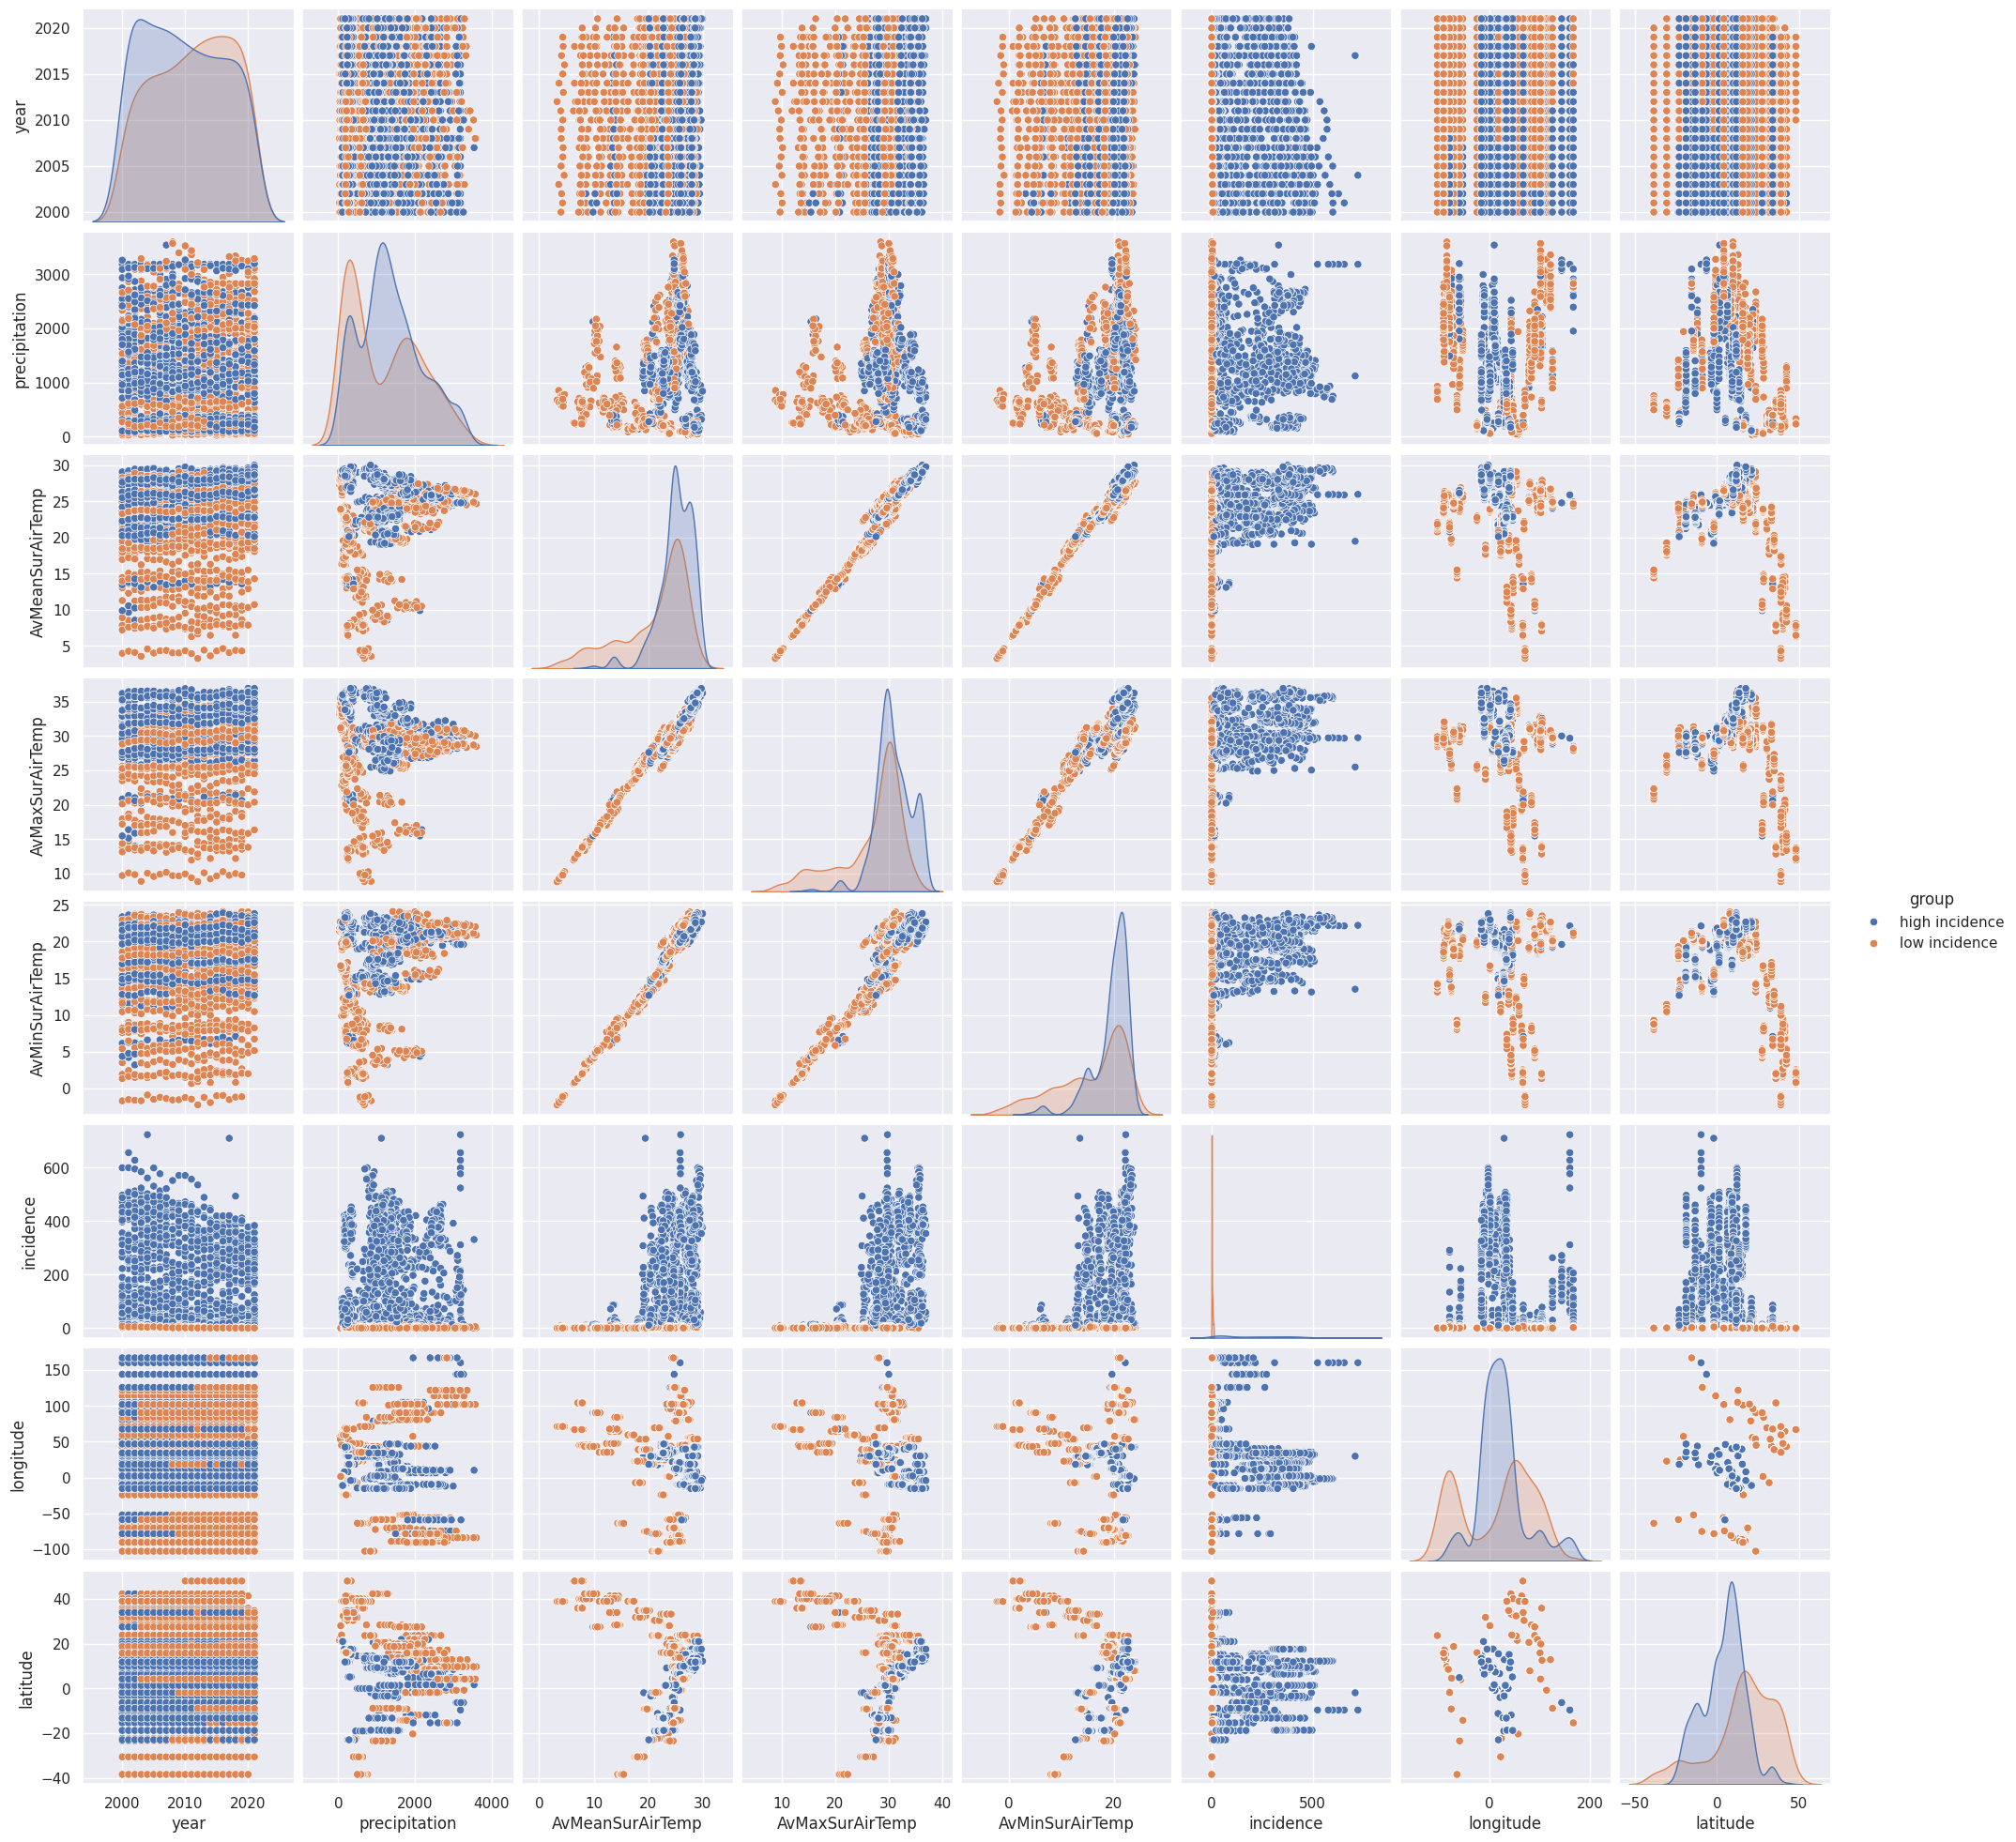

In [188]:
sns.pairplot(df,hue = 'group')
plt.show()

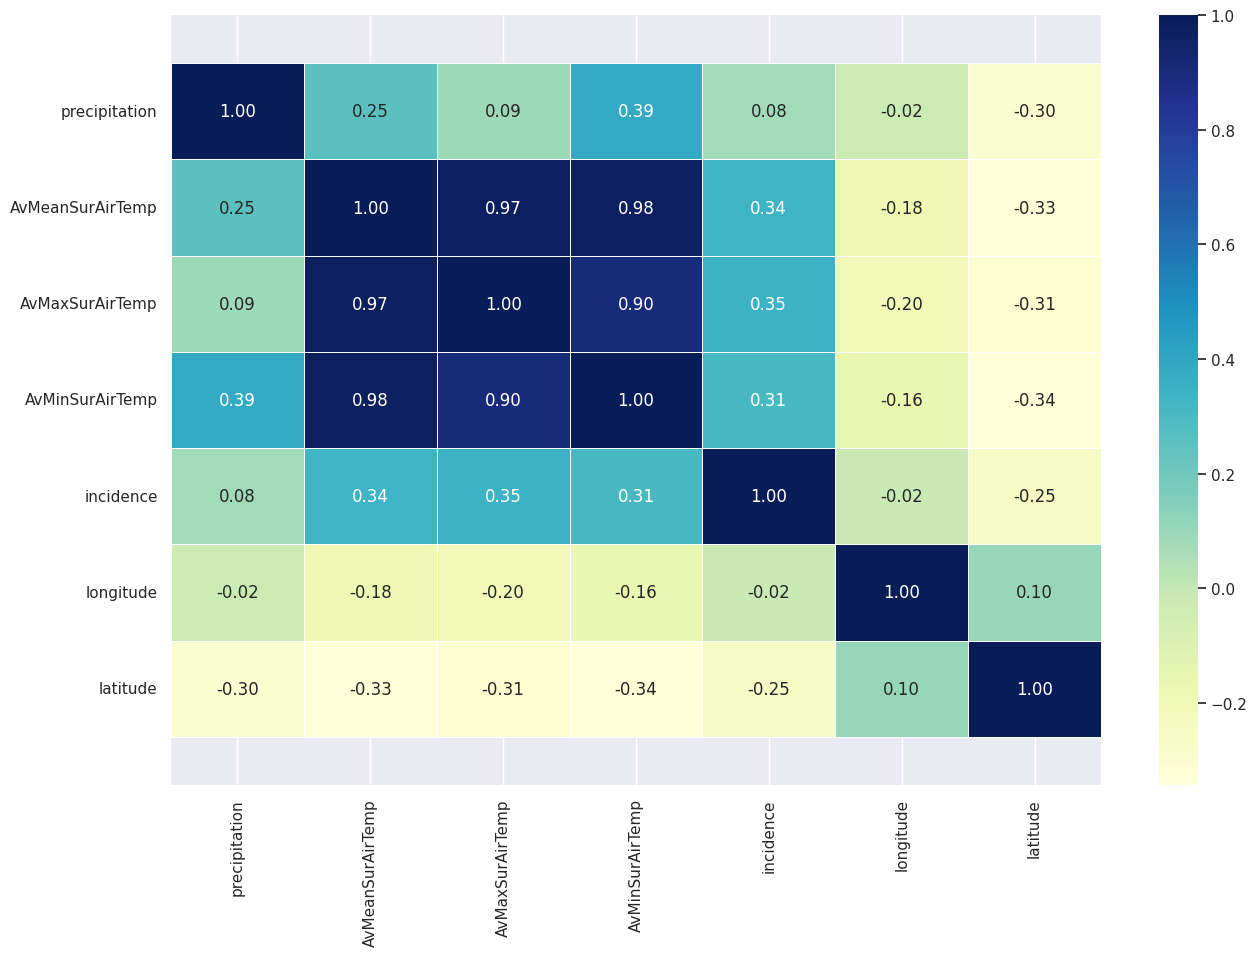

In [103]:
# Let's make a pretty correlation matrix
corr_matrix = df.drop(["country", "year","group"], axis =1).corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

#### Insights
- From the above plot it is clear that all features have a fairly strong correlation with each other and with the target (malaria incidence). All Features will be used for modeling.

#### 7. Principal Component Analysis

In [137]:
from sklearn import set_config
import plotly.express as px
from sklearn.decomposition import PCA 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
set_config(transform_output = "pandas")

In [189]:
# Create Column Transformer with 3 types of transformers
def plotPCA(X):
    """
    plot 3 components PCA
    """
    num_features = X.select_dtypes(exclude="object").columns
    cat_features = X.select_dtypes(include="object").columns
    num_pipeline= Pipeline(
        steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
        ]
    )
    cat_pipeline=Pipeline(
        steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder",OneHotEncoder(sparse_output = False)),
        ("scaler",StandardScaler(with_mean=False))
        ]
    )
    preprocessor=ColumnTransformer(
        [
        ("num_pipeline",num_pipeline,num_features),
        ("cat_pipelines",cat_pipeline,cat_features)
        ]
    )
    X = preprocessor.fit_transform(X)
    pca = PCA(n_components=3)
    pca.fit(X)
    xpca = pca.transform(X)
    pca_data = pd.concat([pd.DataFrame(xpca), targets_df], axis=1)
    fig = px.scatter_3d(
        pca_data,
        x="pca0",
        y="pca1",
        z="pca2",
        color="group",
        labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
    )
    fig.update_yaxes(tickfont=dict(size=8))
    fig.update_xaxes(tickfont=dict(size=12))
    fig.update_layout(height=800, width = 1000)
    fig.show()

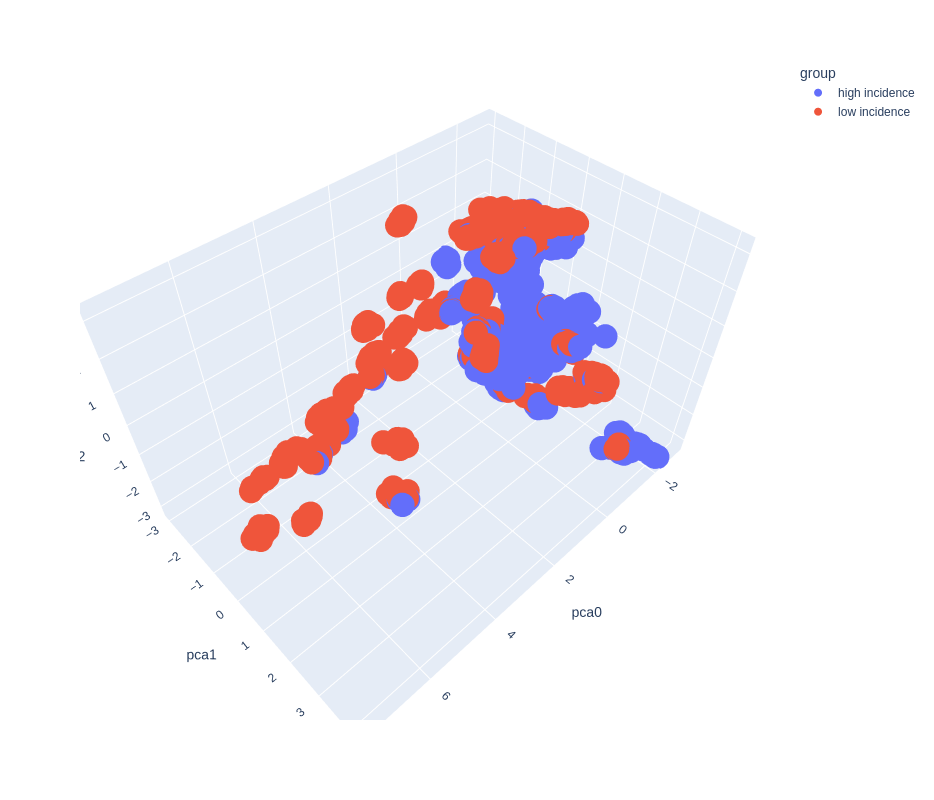

In [140]:
# all data
X = df.drop("group", axis = 1)
targets_df = df["group"]
plotPCA(X)

#### Insights
- There are 2 major clusters and several sub groups.
- It's difficult to separate the two incidence groups (high and low). Indicating a simple ML model might find it difficult to classify correctly.

### 5. Conclusions
- Malaria Incidence is strongly correlated with precipitation and surface air temperature.
- Regions with low surface air temperature experience a low incidence in malaria and vice versa.
- Precipitation affects malaria in an interesting way. As the the precipitation increase, malaria incidence increases, as expected, but if the precipitation becomes to much (higher than 2000 mm), malaria incidence drops.

In [190]:
# save data
df.to_csv("data/data.csv", index = False)